<a href="https://colab.research.google.com/github/alem-147/Feature_Extraction/blob/main/Feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import packages**


## **Load and visualize MNIST data**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage import measure

import warnings
warnings.filterwarnings("ignore") # Added this at the end to show a clean output with no warnings but not necessary 

### Choose number to visualize (from 0 to 9):

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
number = 5
x = x_train[y_train==number,:,:]
print('The shape of x is:')
print(x.shape)
print('which means:')
print('Number '+str(number)+' has '+str(x.shape[0])+' images of size '+str(x.shape[1])+'x'+str(x.shape[2]))

The shape of x is:
(5421, 28, 28)
which means:
Number 5 has 5421 images of size 28x28


### Plot average image:

Text(0.5, 1.0, 'Thresholded image')

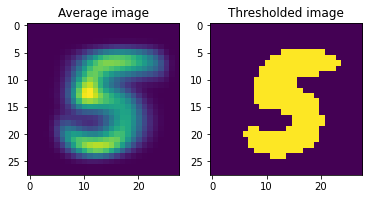

In [ ]:
m = np.mean(x, axis=0) 

# print(x[0])
# print(m)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(m)
plt.title('Average image')

mt = 1*(m > 60) # Thresholding
plt.subplot(1,2,2)
plt.imshow(mt)
plt.title('Thresholded image')

## From a thresholded image, we can use the regionprops function from skimage.measure

In [ ]:
mt_props = measure.regionprops(mt)
num_regions = len(mt_props)
print(str(num_regions)+' region/s were found')
print('')

print('Area (in pixels):')
area = mt_props[0].area # Remember, index 0 is the first region found
print(area)
print('')

print('Perimeter (in pixels):')
perimeter = mt_props[0].perimeter
print(perimeter)
print('')

print('Centroid (pixel coordinates):')
centroid = mt_props[0].centroid
print(centroid)

print('Eccentricity:')
eccentricity = mt_props[0].eccentricity
print(eccentricity)
print('')

print('Minor axis length:')
minor_axis = mt_props[0].minor_axis_length
print(minor_axis)
print('')



1 region/s were found

Area (in pixels):
196

Perimeter (in pixels):
82.18376618407356

Centroid (pixel coordinates):
(13.994897959183673, 14.066326530612244)
Eccentricity:
0.7913404594738829

Minor axis length:
14.30801632317288



## Example: Scatter plot of Area vs Perimeter for all images of numbers "number" and "number+1"
### Are "Area" and "Perimeter" good features to classify "number" and "number+1"?

Text(0.5, 1.0, 'perim')

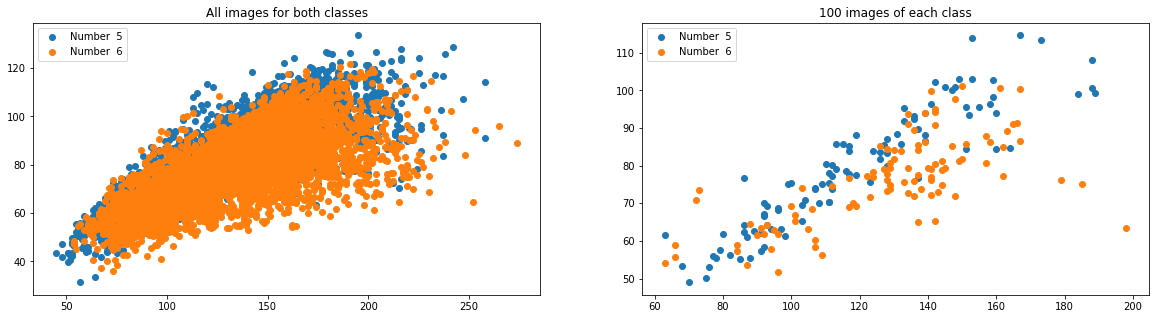

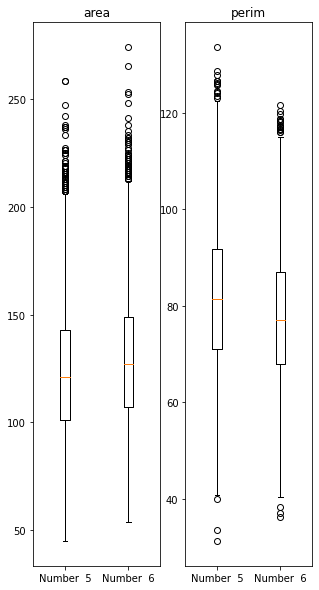

In [ ]:
x5 = x_train[y_train==number,:,:]
x6 = x_train[y_train==number+1,:,:]
buf5 = "Number  %d" % number
buf6 = "Number  %d" % (number+1)
# Threshold images
t5 = 1*(x5 > 60)
t6 = 1*(x6 > 60)

# Region properties
area5 = np.zeros(t5.shape[0])
perimeter5 = np.zeros(t5.shape[0])
for i in range(0,t5.shape[0]):
  props = measure.regionprops(t5[i,:,:])
  area5[i] = props[0].area
  perimeter5[i] = props[0].perimeter
  
area6 = np.zeros(t6.shape[0])
perimeter6 = np.zeros(t6.shape[0])
for i in range(0,t6.shape[0]):
  props = measure.regionprops(t6[i,:,:])
  area6[i] = props[0].area
  perimeter6[i] = props[0].perimeter
  
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(area5,perimeter5, label=buf5)
plt.scatter(area6,perimeter6, label=buf6)
plt.title('All images for both classes')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(area5[0:100],perimeter5[0:100], label=buf5)
plt.scatter(area6[0:100],perimeter6[0:100], label=buf6)
plt.title('100 images of each class')
plt.legend()

plt.figure(figsize=(5,10))
plt.subplot(1,2,1)
plt.boxplot([area5, area6],labels=[buf5,buf6])
plt.title('area')

plt.subplot(1,2,2)
plt.boxplot([perimeter5, perimeter6],labels=[buf5,buf6])
plt.title('perim')

## Centroids and euclidian distance




{'whiskers': [<matplotlib.lines.Line2D at 0x7fc41c7e5710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc41c7ec1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc41c7e51d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc41c7ecc90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc41c7f4210>,
 'means': []}

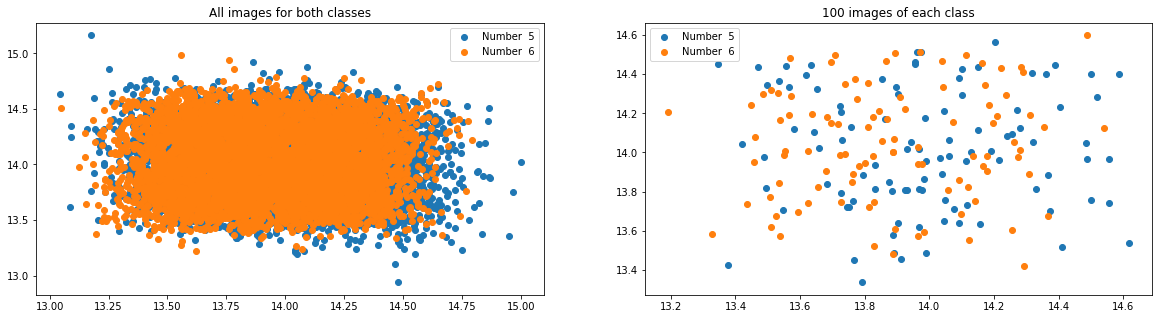

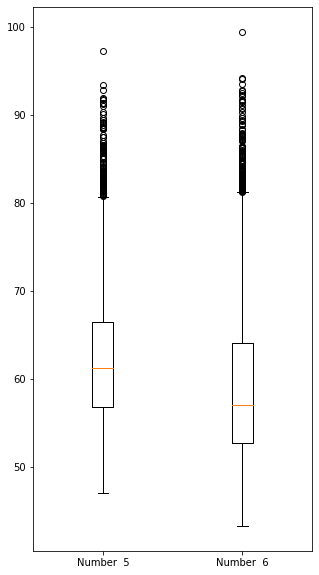

In [ ]:
n1 = x_train[y_train==number,:,:]
n2 = x_train[y_train==number+1,:,:]
buf1 = "Number  %d" % number
buf2 = "Number  %d" % (number+1)
# Threshold images
thresh1 = 1*(n1 > 60)
thresh2 = 1*(n2 > 60)

# Region properties (centroid)

centroid1 = np.zeros((thresh1.shape[0],2), dtype='float')
# print(centroid1.shape)
for i in range(0, thresh1.shape[0]):
  props = measure.regionprops(thresh1[i,:,:])
  centroid1[i][0],centroid1[i][1] = props[0].centroid

x1, y1 = centroid1.T
# print("centroids for:", number, centroid1)

centroid2 = np.zeros((thresh2.shape[0],2), dtype='float')
for i in range(0, thresh2.shape[0]):
  props = measure.regionprops(thresh2[i,:,:])
  centroid2[i][0],centroid2[i][1] = props[0].centroid

x2, y2 = centroid2.T
# print("centroids for:", number + 1, centroid2)

# Variability of values (euc distance of each pixel value to labels average pixel value)
mean1 = np.mean(n1, axis=0)
# print(mean1)
euc_dist1 = np.zeros(n1.shape[0])
for i in range(0, n1.shape[0]):
  euc_dist1[i] = np.sqrt(np.mean(np.square(n1[i]-mean1)))

mean2 = np.mean(n2, axis=0)
euc_dist2 = np.zeros(n2.shape[0])
for i in range(0, n2.shape[0]):
  euc_dist2[i] = np.sqrt(np.mean(np.square(n2[i]-mean2)))

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(x1,y1, label=buf1)
plt.scatter(x2,y2, label=buf2)
plt.title('All images for both classes')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x1[0:100],y1[0:100], label=buf1)
plt.scatter(x2[0:100],y2[0:100], label=buf2)
plt.title('100 images of each class')
plt.legend()

plt.figure(figsize=(5,10))
plt.boxplot([euc_dist1, euc_dist2],labels=[buf1,buf2])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc41c680190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc41c680c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc41c679c50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc41c685710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc41c685c50>,
 'means': []}

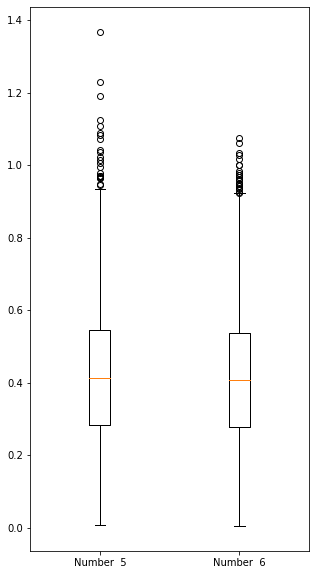

In [ ]:
# Variablilty of centroid (euc distance of each images centroid to the label centroid (mean#))
mean1 = np.mean(n1, axis=0)
mean1_thresh = 1*(mean1 > 60) # Thresholding
m1_props = measure.regionprops(mean1_thresh)
mean1_centroid = m1_props[0].centroid
# print(centroid1.shape)
euc_dist1 = np.zeros(n1.shape[0])
# euc_dist1_test = np.zeros(n1.shape[0])
for i in range(0, n1.shape[0]):
    # euc_dist1[i] = np.sqrt(np.mean(np.square(centroid1[i]-mean1_centroid)))
    # euc_dist1[i] = np.sqrt(np.square(centroid1[i]-mean1_centroid))
    euc_dist1[i] = np.sqrt(np.square(x1[i]-mean1_centroid[0])+np.square(y1[i]-mean1_centroid[1]))


mean2 = np.mean(n2, axis=0)
mean2_thresh = 1*(mean2 > 60) # Thresholding
m2_props = measure.regionprops(mean2_thresh)
mean2_centroid = m2_props[0].centroid
# print(centroid1.shape)
euc_dist2 = np.zeros(n2.shape[0])
# euc_dist2_test = np.zeros(n2.shape[0])
for i in range(0, n2.shape[0]):
    # euc_dist2[i] = np.sqrt(np.mean(np.square(centroid2[i]-mean2_centroid)))
    euc_dist2[i] = np.sqrt(np.square(x2[i]-mean2_centroid[0])+np.square(y2[i]-mean2_centroid[1]))


plt.figure(figsize=(5,10))
plt.boxplot([euc_dist1, euc_dist2],labels=[buf1,buf2])

## edge detection